In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns




In [10]:
df=pd.read_csv("/kaggle/input/road-traffic-accidents/RTA Dataset.csv")

In [11]:
df.describe

<bound method NDFrame.describe of            Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee    

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [13]:
df.shape


(12316, 32)

In [14]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [15]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [18]:
df_cleaned = df[['Type_of_vehicle', 'Road_surface_type', 'Weather_conditions', 'Light_conditions', 'Pedestrian_movement', 'Accident_severity']].dropna()


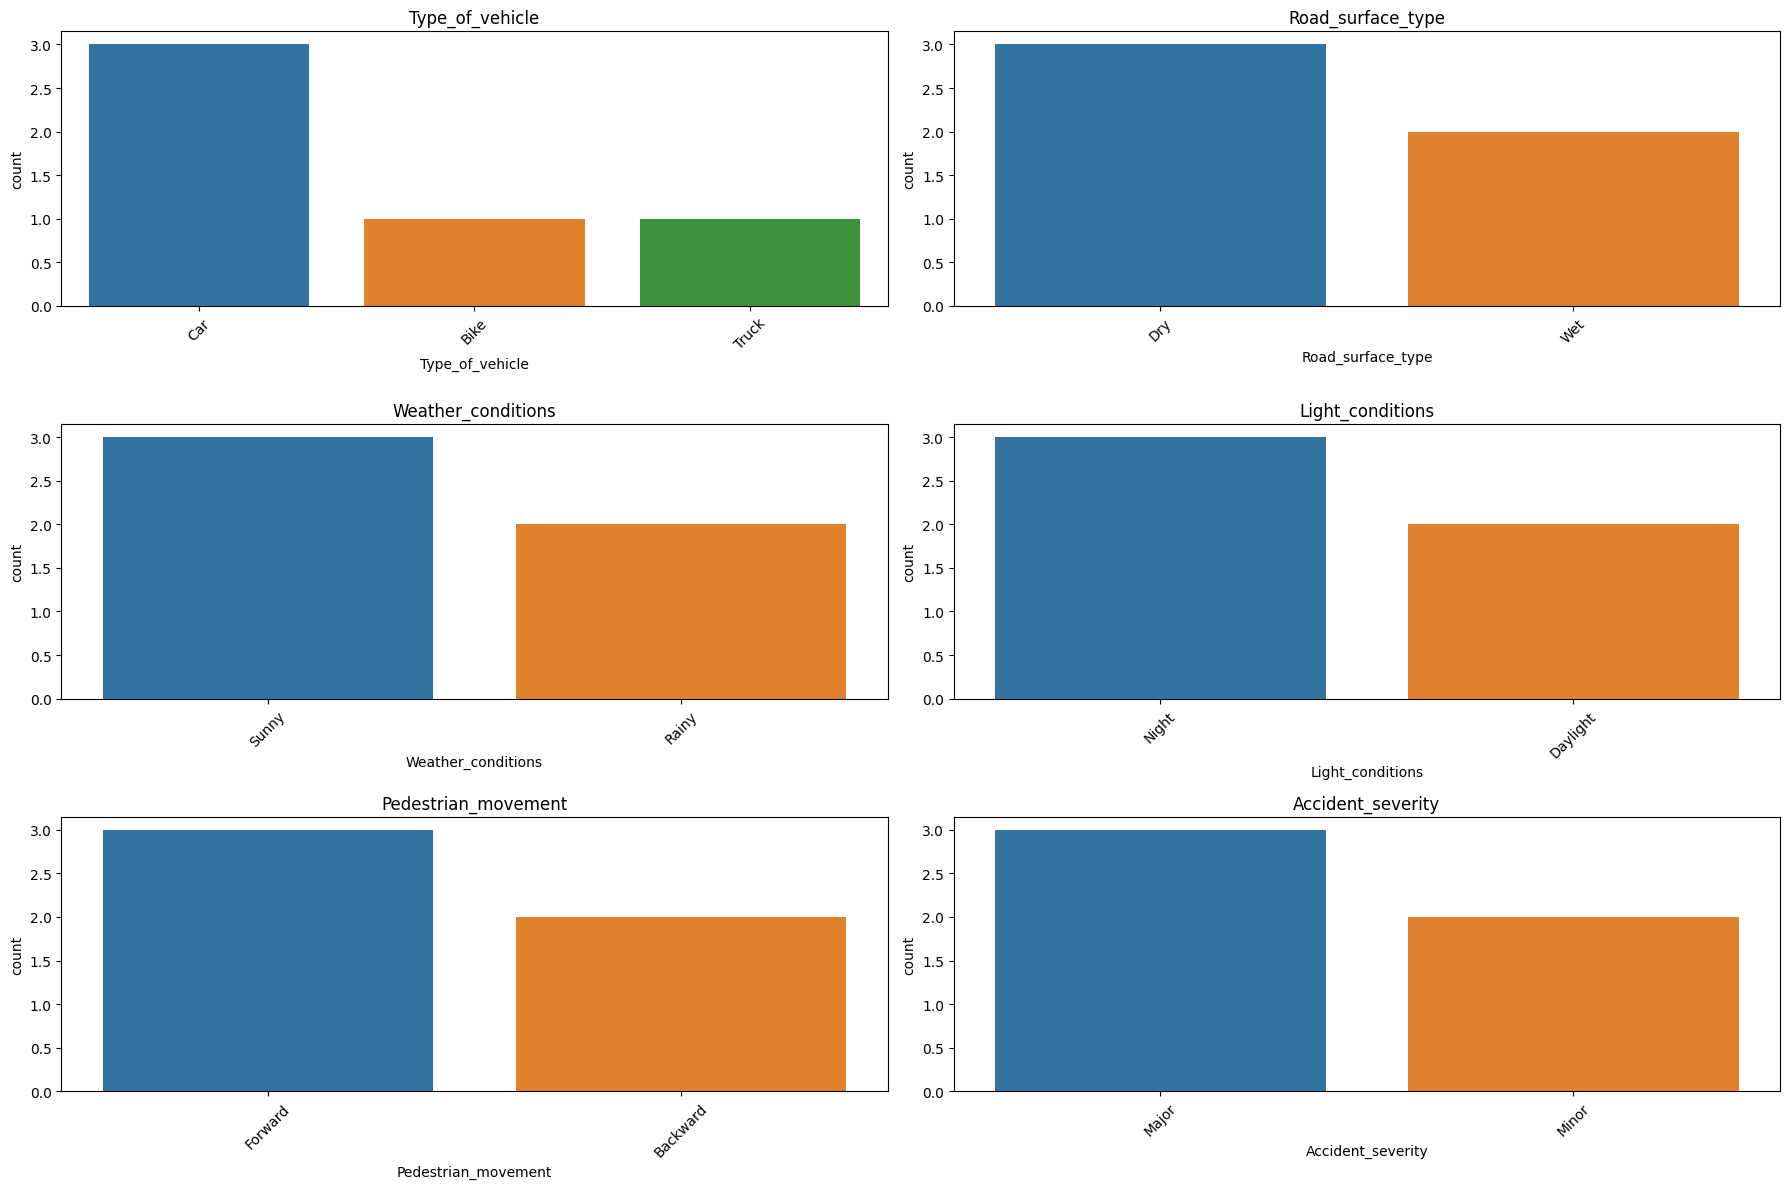

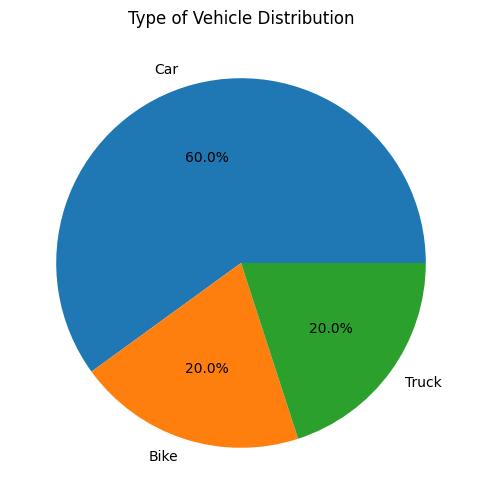

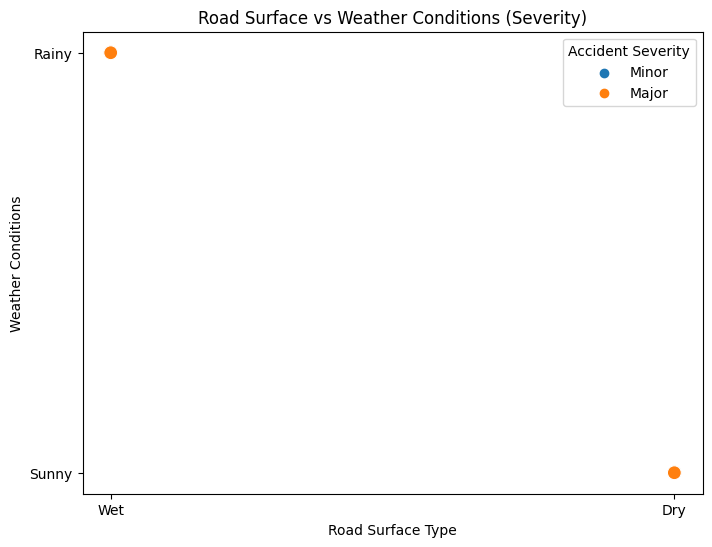

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
df_cleaned = pd.DataFrame({
    'Type_of_vehicle': ['Car', 'Car', 'Bike', 'Truck', 'Car'],
    'Road_surface_type': ['Wet', 'Dry', 'Wet', 'Dry', 'Dry'],
    'Weather_conditions': ['Rainy', 'Sunny', 'Rainy', 'Sunny', 'Sunny'],
    'Light_conditions': ['Daylight', 'Night', 'Daylight', 'Night', 'Night'],
    'Pedestrian_movement': ['Forward', 'Backward', 'Forward', 'Forward', 'Backward'],
    'Accident_severity': ['Minor', 'Major', 'Major', 'Minor', 'Major']
})

# Count plot for categorical variables
plt.figure(figsize=(18, 12))
for i, column in enumerate(df_cleaned.columns):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df_cleaned, x=column, order=df_cleaned[column].value_counts().index)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Pie chart for Type of vehicle
plt.figure(figsize=(8, 6))
vehicle_counts = df_cleaned['Type_of_vehicle'].value_counts()
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%')
plt.title('Type of Vehicle Distribution')
plt.show()

# Scatter plot for Road surface type and Weather conditions
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Road_surface_type', y='Weather_conditions', hue='Accident_severity', s=100)
plt.title('Road Surface vs Weather Conditions (Severity)')
plt.xlabel('Road Surface Type')
plt.ylabel('Weather Conditions')
plt.legend(title='Accident Severity')
plt.show()



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample DataFrame
df_cleaned = pd.DataFrame({
    'Type_of_vehicle': ['Car', 'Car', 'Bike', 'Truck', 'Car'],
    'Road_surface_type': ['Wet', 'Dry', 'Wet', 'Dry', 'Dry'],
    'Weather_conditions': ['Rainy', 'Sunny', 'Rainy', 'Sunny', 'Sunny'],
    'Light_conditions': ['Daylight', 'Night', 'Daylight', 'Night', 'Night'],
    'Pedestrian_movement': ['Forward', 'Backward', 'Forward', 'Forward', 'Backward'],
    'Accident_severity': ['Minor', 'Major', 'Major', 'Minor', 'Major']
})

# Encoding categorical variables
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Prepare data for Random Forest
X = df_encoded.drop('Accident_severity_Minor', axis=1)  # Predictor variables
y = df_encoded['Accident_severity_Minor']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

